In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar10_root = '../cifar10'
ipc500 = np.loadtxt('./random_ipc_index/cifar10/ipc_500.txt', dtype=int)
ipc500

array([13647,  4117,  9620, ...,  2597, 13090, 27127])

In [3]:
cifar10_train = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 32
train_data_loader = DataLoader(cifar10_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc500))
test_data_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

157

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar10_ipc500'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=10, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 157/157 [00:01<00:00, 89.39it/s, loss=1.38] 


epoch: 1 done, loss: 0.006015047896653414
Acc: 0.4299
[0.001]


Epoch 2: 100%|██████████| 157/157 [00:01<00:00, 135.55it/s, loss=1.21]


epoch: 2 done, loss: 0.004826339427381754
Acc: 0.4824
[0.001]


Epoch 3: 100%|██████████| 157/157 [00:01<00:00, 129.14it/s, loss=1.05]


epoch: 3 done, loss: 0.004251428879797459
Acc: 0.5004
[0.001]


Epoch 4: 100%|██████████| 157/157 [00:01<00:00, 127.88it/s, loss=1.42] 


epoch: 4 done, loss: 0.0038732693064957857
Acc: 0.5498
[0.001]


Epoch 5: 100%|██████████| 157/157 [00:01<00:00, 127.71it/s, loss=1.1]  


epoch: 5 done, loss: 0.003569877939298749
Acc: 0.5696
[0.001]


Epoch 6: 100%|██████████| 157/157 [00:01<00:00, 135.16it/s, loss=0.93] 


epoch: 6 done, loss: 0.003353674430400133
Acc: 0.582
[0.001]


Epoch 7: 100%|██████████| 157/157 [00:01<00:00, 126.51it/s, loss=1.53] 


epoch: 7 done, loss: 0.0031689482275396585
Acc: 0.5872
[0.001]


Epoch 8: 100%|██████████| 157/157 [00:01<00:00, 118.36it/s, loss=0.768]


epoch: 8 done, loss: 0.0030299504287540913
Acc: 0.6075
[0.001]


Epoch 9: 100%|██████████| 157/157 [00:01<00:00, 128.96it/s, loss=0.994]


epoch: 9 done, loss: 0.002884485060349107
Acc: 0.6062
[0.001]


Epoch 10: 100%|██████████| 157/157 [00:01<00:00, 113.77it/s, loss=0.635]


epoch: 10 done, loss: 0.0027065800968557596
Acc: 0.5989
[0.001]


Epoch 11: 100%|██████████| 157/157 [00:01<00:00, 129.45it/s, loss=0.682]


epoch: 11 done, loss: 0.0026223009917885065
Acc: 0.6163
[0.001]


Epoch 12: 100%|██████████| 157/157 [00:01<00:00, 131.71it/s, loss=1.15] 


epoch: 12 done, loss: 0.0025227440055459738
Acc: 0.6115
[0.001]


Epoch 13: 100%|██████████| 157/157 [00:01<00:00, 120.78it/s, loss=1.21] 


epoch: 13 done, loss: 0.0023970003239810467
Acc: 0.6208
[0.001]


Epoch 14: 100%|██████████| 157/157 [00:01<00:00, 124.09it/s, loss=0.938]


epoch: 14 done, loss: 0.0023863837122917175
Acc: 0.6339
[0.001]


Epoch 15: 100%|██████████| 157/157 [00:01<00:00, 122.10it/s, loss=0.761]


epoch: 15 done, loss: 0.0022668696474283934
Acc: 0.6161
[0.001]


Epoch 16: 100%|██████████| 157/157 [00:01<00:00, 118.27it/s, loss=1.09] 


epoch: 16 done, loss: 0.0021345471031963825
Acc: 0.6275
[0.001]


Epoch 17: 100%|██████████| 157/157 [00:01<00:00, 120.01it/s, loss=0.669]


epoch: 17 done, loss: 0.002067422727122903
Acc: 0.6291
[0.001]


Epoch 18: 100%|██████████| 157/157 [00:01<00:00, 125.15it/s, loss=0.667]


epoch: 18 done, loss: 0.0019857466686517
Acc: 0.6223
[0.0001]


Epoch 19: 100%|██████████| 157/157 [00:01<00:00, 131.04it/s, loss=0.424]


epoch: 19 done, loss: 0.0016460403567180037
Acc: 0.645
[0.0001]


Epoch 20: 100%|██████████| 157/157 [00:01<00:00, 121.36it/s, loss=1.13] 


epoch: 20 done, loss: 0.0015339598758146167
Acc: 0.6496
[0.0001]


Epoch 21: 100%|██████████| 157/157 [00:01<00:00, 130.77it/s, loss=0.454]


epoch: 21 done, loss: 0.001505232765339315
Acc: 0.6483
[0.0001]


Epoch 22: 100%|██████████| 157/157 [00:01<00:00, 147.80it/s, loss=0.438]


epoch: 22 done, loss: 0.0014734037686139345
Acc: 0.6498
[0.0001]


Epoch 23: 100%|██████████| 157/157 [00:01<00:00, 130.09it/s, loss=0.313]


epoch: 23 done, loss: 0.0014420984080061316
Acc: 0.6482
[0.0001]


Epoch 24: 100%|██████████| 157/157 [00:01<00:00, 136.65it/s, loss=0.324]


epoch: 24 done, loss: 0.0014178450219333172
Acc: 0.6489
[0.0001]


Epoch 25: 100%|██████████| 157/157 [00:01<00:00, 142.49it/s, loss=0.217]


epoch: 25 done, loss: 0.001414232887327671
Acc: 0.6482
[1e-05]


Epoch 26: 100%|██████████| 157/157 [00:01<00:00, 113.77it/s, loss=0.099]


epoch: 26 done, loss: 0.0013442750787362456
Acc: 0.652
[1e-05]


Epoch 27: 100%|██████████| 157/157 [00:01<00:00, 133.14it/s, loss=0.539]


epoch: 27 done, loss: 0.001376896514557302
Acc: 0.6528
[1e-05]


Epoch 28: 100%|██████████| 157/157 [00:01<00:00, 132.53it/s, loss=0.522]


epoch: 28 done, loss: 0.0013565827393904328
Acc: 0.653
[1e-05]


Epoch 29: 100%|██████████| 157/157 [00:01<00:00, 135.03it/s, loss=0.202]


epoch: 29 done, loss: 0.0013540019281208515
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 157/157 [00:01<00:00, 125.01it/s, loss=0.94] 


epoch: 30 done, loss: 0.0013688253238797188
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 157/157 [00:01<00:00, 120.39it/s, loss=0.458]


epoch: 31 done, loss: 0.0013670367188751698
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 157/157 [00:01<00:00, 125.99it/s, loss=0.122]


epoch: 32 done, loss: 0.0013472577556967735
Acc: 0.6525
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 157/157 [00:01<00:00, 113.68it/s, loss=0.509]


epoch: 33 done, loss: 0.0013579296646639705
Acc: 0.6526
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 157/157 [00:01<00:00, 133.34it/s, loss=0.081]


epoch: 34 done, loss: 0.0013328333152458072
Acc: 0.6526
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 157/157 [00:01<00:00, 125.46it/s, loss=0.165]


epoch: 35 done, loss: 0.0013311743969097733
Acc: 0.6525
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 157/157 [00:01<00:00, 130.41it/s, loss=0.245]


epoch: 36 done, loss: 0.0013383784098550677
Acc: 0.6526
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 157/157 [00:01<00:00, 123.97it/s, loss=0.0641]


epoch: 37 done, loss: 0.0013493418227881193
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 157/157 [00:01<00:00, 117.36it/s, loss=0.415]


epoch: 38 done, loss: 0.0013425700599327683
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 157/157 [00:01<00:00, 117.45it/s, loss=0.392]


epoch: 39 done, loss: 0.00135537248570472
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 157/157 [00:01<00:00, 108.63it/s, loss=0.276]


epoch: 40 done, loss: 0.0013408715603873134
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 157/157 [00:01<00:00, 122.38it/s, loss=0.335]


epoch: 41 done, loss: 0.0013531686272472143
Acc: 0.652
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 157/157 [00:01<00:00, 117.05it/s, loss=0.562]


epoch: 42 done, loss: 0.0013458599569275975
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 157/157 [00:01<00:00, 114.99it/s, loss=0.481]


epoch: 43 done, loss: 0.0013340975856408477
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 157/157 [00:01<00:00, 105.02it/s, loss=0.742]


epoch: 44 done, loss: 0.001363044953905046
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 157/157 [00:01<00:00, 95.55it/s, loss=0.46] 


epoch: 45 done, loss: 0.0013474765000864863
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 157/157 [00:01<00:00, 94.98it/s, loss=0.335]


epoch: 46 done, loss: 0.0013481627684086561
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 157/157 [00:01<00:00, 92.16it/s, loss=0.652]


epoch: 47 done, loss: 0.001354776555672288
Acc: 0.6519
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 157/157 [00:01<00:00, 96.66it/s, loss=0.329]


epoch: 48 done, loss: 0.0013400102034211159
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 157/157 [00:01<00:00, 97.83it/s, loss=0.449] 


epoch: 49 done, loss: 0.0013481562491506338
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 157/157 [00:01<00:00, 94.84it/s, loss=0.296]


epoch: 50 done, loss: 0.0013517274055629969
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 157/157 [00:01<00:00, 94.23it/s, loss=0.441]


epoch: 51 done, loss: 0.0013425786746665835
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 157/157 [00:01<00:00, 89.18it/s, loss=0.556]


epoch: 52 done, loss: 0.0013439427129924297
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 157/157 [00:01<00:00, 81.77it/s, loss=0.562]


epoch: 53 done, loss: 0.0013413237174972892
Acc: 0.6526
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 157/157 [00:02<00:00, 77.15it/s, loss=0.958]


epoch: 54 done, loss: 0.0013375038979575038
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 157/157 [00:01<00:00, 88.79it/s, loss=0.829]


epoch: 55 done, loss: 0.0013619950041174889
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 157/157 [00:01<00:00, 79.10it/s, loss=0.383]


epoch: 56 done, loss: 0.0013440365437418222
Acc: 0.652
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 157/157 [00:01<00:00, 86.51it/s, loss=0.25] 


epoch: 57 done, loss: 0.0013353846734389663
Acc: 0.6517
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 157/157 [00:01<00:00, 82.99it/s, loss=0.255]


epoch: 58 done, loss: 0.0013397997245192528
Acc: 0.652
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 157/157 [00:01<00:00, 84.66it/s, loss=0.357]


epoch: 59 done, loss: 0.0013231922639533877
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 157/157 [00:01<00:00, 80.51it/s, loss=0.585]


epoch: 60 done, loss: 0.0013511700090020895
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 157/157 [00:02<00:00, 76.74it/s, loss=0.361]


epoch: 61 done, loss: 0.0013564372202381492
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 157/157 [00:02<00:00, 78.11it/s, loss=0.563]


epoch: 62 done, loss: 0.00134305190294981
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 157/157 [00:02<00:00, 75.28it/s, loss=0.0752]


epoch: 63 done, loss: 0.0013500683708116412
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 157/157 [00:02<00:00, 72.40it/s, loss=0.625]


epoch: 64 done, loss: 0.001331994542852044
Acc: 0.6524
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 157/157 [00:02<00:00, 74.95it/s, loss=0.361]


epoch: 65 done, loss: 0.0013344781473279
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 157/157 [00:01<00:00, 80.40it/s, loss=0.182]


epoch: 66 done, loss: 0.001349858706817031
Acc: 0.652
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 157/157 [00:02<00:00, 72.59it/s, loss=0.422]


epoch: 67 done, loss: 0.0013353755930438638
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 157/157 [00:02<00:00, 74.17it/s, loss=0.532]


epoch: 68 done, loss: 0.0013322602026164532
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 157/157 [00:02<00:00, 76.45it/s, loss=0.32] 


epoch: 69 done, loss: 0.0013302862644195557
Acc: 0.6524
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 157/157 [00:02<00:00, 74.32it/s, loss=0.32] 


epoch: 70 done, loss: 0.001350179547443986
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 157/157 [00:02<00:00, 74.21it/s, loss=0.207]


epoch: 71 done, loss: 0.0013334612594917417
Acc: 0.652
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 157/157 [00:02<00:00, 69.94it/s, loss=0.297]


epoch: 72 done, loss: 0.0013446781085804105
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 157/157 [00:02<00:00, 69.75it/s, loss=0.71] 


epoch: 73 done, loss: 0.0013647229643538594
Acc: 0.6524
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 157/157 [00:02<00:00, 74.54it/s, loss=0.326]


epoch: 74 done, loss: 0.0013602698454633355
Acc: 0.6525
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 157/157 [00:02<00:00, 76.68it/s, loss=0.383]


epoch: 75 done, loss: 0.0013530703727155924
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 157/157 [00:02<00:00, 70.85it/s, loss=0.206]


epoch: 76 done, loss: 0.00133698305580765
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 157/157 [00:02<00:00, 76.41it/s, loss=0.667]


epoch: 77 done, loss: 0.0013174314517527819
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 157/157 [00:02<00:00, 71.51it/s, loss=0.451]


epoch: 78 done, loss: 0.001344956923276186
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 157/157 [00:02<00:00, 71.08it/s, loss=0.774]


epoch: 79 done, loss: 0.0013425800716504455
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 157/157 [00:02<00:00, 76.90it/s, loss=0.192]


epoch: 80 done, loss: 0.0013201559195294976
Acc: 0.652
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 157/157 [00:02<00:00, 71.26it/s, loss=0.618]


epoch: 81 done, loss: 0.00133288383949548
Acc: 0.652
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 157/157 [00:02<00:00, 73.13it/s, loss=0.337]


epoch: 82 done, loss: 0.0013443048810586333
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 157/157 [00:02<00:00, 72.94it/s, loss=0.109]


epoch: 83 done, loss: 0.001348700257949531
Acc: 0.6524
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 157/157 [00:02<00:00, 78.06it/s, loss=0.11] 


epoch: 84 done, loss: 0.0013333327369764447
Acc: 0.6524
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 157/157 [00:02<00:00, 70.37it/s, loss=0.41] 


epoch: 85 done, loss: 0.0013409496750682592
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 157/157 [00:02<00:00, 73.31it/s, loss=0.309]


epoch: 86 done, loss: 0.0013140385271981359
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 157/157 [00:01<00:00, 80.15it/s, loss=0.454]


epoch: 87 done, loss: 0.0013457402819767594
Acc: 0.6524
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 157/157 [00:01<00:00, 79.36it/s, loss=0.301]


epoch: 88 done, loss: 0.0013340121367946267
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 157/157 [00:02<00:00, 74.50it/s, loss=0.143]


epoch: 89 done, loss: 0.001331605832092464
Acc: 0.652
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 157/157 [00:01<00:00, 79.94it/s, loss=0.371]


epoch: 90 done, loss: 0.0013457877794280648
Acc: 0.652
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 157/157 [00:02<00:00, 74.11it/s, loss=0.35] 


epoch: 91 done, loss: 0.0013459539040923119
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 157/157 [00:02<00:00, 75.57it/s, loss=0.313]


epoch: 92 done, loss: 0.001334051601588726
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 157/157 [00:02<00:00, 71.09it/s, loss=0.342]


epoch: 93 done, loss: 0.001324197044596076
Acc: 0.652
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 157/157 [00:02<00:00, 69.39it/s, loss=0.618]


epoch: 94 done, loss: 0.001331655541434884
Acc: 0.652
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 157/157 [00:02<00:00, 76.11it/s, loss=0.56] 


epoch: 95 done, loss: 0.0013274584198370576
Acc: 0.6517
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 157/157 [00:02<00:00, 78.47it/s, loss=0.625]


epoch: 96 done, loss: 0.001339483424089849
Acc: 0.6521
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 157/157 [00:02<00:00, 73.63it/s, loss=0.282]


epoch: 97 done, loss: 0.0013166663702577353
Acc: 0.6522
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 157/157 [00:02<00:00, 73.61it/s, loss=0.508]


epoch: 98 done, loss: 0.0013419811148196459
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 157/157 [00:02<00:00, 72.64it/s, loss=0.164]


epoch: 99 done, loss: 0.0013400574680417776
Acc: 0.6523
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 157/157 [00:02<00:00, 72.63it/s, loss=0.34] 


epoch: 100 done, loss: 0.0013170641614124179
Acc: 0.6524
[1.0000000000000002e-06]
Time taken: 397.723947 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.653, tensor(0.0325, device='cuda:0'))

<AxesSubplot: >

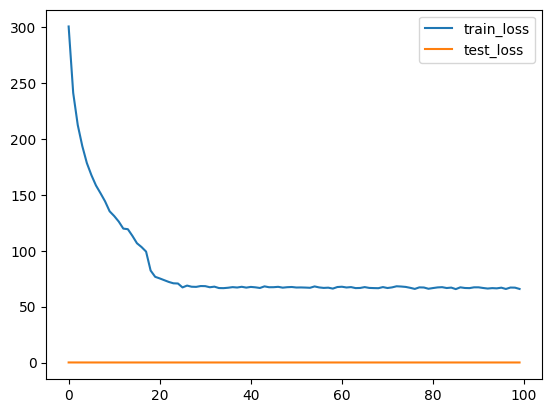

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])